# Proyecto de Ciencia de Datos: Clasificación de Quejas

En este proyecto, desarrollaremos un modelo de machine learning para predecir la categoría adecuada para cada nueva queja recibida. Comenzaremos importando las librerías necesarias y cargando el dataset inicial, el cual requiere limpieza y preparación antes de su uso.

## Preprocesamiento de Datos

In [118]:
import pandas as pd
import json

In [119]:
# Cargamos el archivo tickets_classification_eng.json que se encuentra en la carpeta data/raw_data.

file_path = './raw_data/tickets_classification_eng.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [120]:
df = pd.json_normalize(data)
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

Seleccionamos las columnas relevantes

In [122]:
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]

Renombrar las columnas para que sean mas legibles

In [123]:
df.rename(columns={
    '_source.complaint_what_happened': 'complaint_what_happened',
    '_source.product': 'category',
    '_source.sub_product': 'sub_product'
}, inplace=True)

Creamos una nueva columna ticket_classification

In [124]:
df['ticket_classification'] = df['category'] + ' + ' + df['sub_product']

Eliminamos columnas redundantes

In [125]:
df.drop(columns=['category', 'sub_product'], inplace=True)

Limpiamos los datos en la columna complaint_what_happened

In [126]:
# Contar los Nulos en complaint_what_happened
df['complaint_what_happened'].isnull().sum()

0

In [127]:
# Revisar si hay campos vacios en complaint_what_happened
lambda x: x == ''
df['complaint_what_happened'].apply(lambda x: x == '').sum()

57241

In [128]:
# Revisar si hay nulos enmasacarados en complaint_what_happened
lambda x: x == 'nan' or x == 'NaN' or x == 'NAN' or x == 'n/a' or x == 'N/A' or x == '' or x == ' '
df['complaint_what_happened'].apply(lambda x: x == 'nan').sum()

0

In [129]:
# Reemplazamos por el nulo de pandas
df['complaint_what_happened'].replace('', pd.NA, inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_27896\3742695349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['complaint_what_happened'].replace('', pd.NA, inplace=True)


In [130]:
# Revisar si hay campos vacios en complaint_what_happened de nuevo
lambda x: x == ''
df['complaint_what_happened'].apply(lambda x: x == '').sum()

0

In [131]:
# Contar los Nulos en complaint_what_happened otra vez
df['complaint_what_happened'].isnull().sum()

57241

Eliminamos las filas con datos faltantes en complaint_what_happened y ticket_classification

In [132]:
# Contral los nulos en ticket_classification y complaint_what_happened
df['ticket_classification'].isnull().sum()

10571

In [133]:
df['complaint_what_happened'].isnull().sum()

57241

In [134]:
df.dropna(subset=['complaint_what_happened', 'ticket_classification'], inplace=True)

In [135]:
# Contar si se eliminaron los nulos
df['complaint_what_happened'].isnull().sum()

0

In [136]:
df['ticket_classification'].isnull().sum()

0

reiniciamos el indice en el dataframe para que si este consecutivo despues de eliminar filas

In [137]:
df.reset_index(drop=True, inplace=True)

In [138]:
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


Guardamos el dataframe limpio en un nuevo archivo CSV

In [139]:
import os

# Creamos la carpeta clean_data si no existe
os.makedirs('data/clean_data', exist_ok=True)

df.to_csv('data/clean_data/cleaned_tickets.csv', index=False)

## EDA

In [140]:
df = pd.read_csv('./data/clean_data/cleaned_tickets.csv')
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


Vemos el contenido de las primeras filas para ver como quedo el dataframe

In [141]:
df.head()

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


complaint_what_happened: Contiene el texto de la queja del cliente.
ticket_classification: Es la combinación de la categoría y subcategoría del producto afectado.

Sacamos información del dataset

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18963 entries, 0 to 18962
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  18963 non-null  object
 1   ticket_classification    18963 non-null  object
dtypes: object(2)
memory usage: 296.4+ KB


Ambas columnas son de tipo object, porque contienen texto.

In [143]:
df.describe()

,complaint_what_happened,ticket_classification
count,18963,18963
unique,18824,78
top,Chase has violated 15 USC 1692 by continuing c...,Credit card or prepaid card + General-purpose ...
freq,11,4918


complaint_what_happened:

- count: 18,963 (número total de quejas).
- unique: 18,824 (número de quejas únicas).
- top: El texto de la queja más frecuente.
- freq: 11 (esta queja específica aparece 11 veces).

ticket_classification:

- count: 18,963.
- unique: 78 (número de clasificaciones únicas).
- top: "Credit card or prepaid card + General-purpose credit card or charge card".
- freq: 4,918 (esta clasificación aparece 4,918 veces).

Interpretación:

- La mayoría de las quejas son únicas, entonces hay varios problemas reportados.
- La clasificación de tickets más común está relacionada con tarjetas de crédito, lo que mas les importa los clientes.

Analizamos como se distribuyen las categorias en el dataset

In [144]:
ticket_counts = df['ticket_classification'].value_counts()
ticket_counts.head(10)

ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           4918
Checking or savings account + Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Bank account or service + Checking account                                                         1242
Mortgage + Conventional home mortgage                                                               955
Mortgage + Conventional fixed mortgage                                                              785
Mortgage + FHA mortgage                                                                             496
Debt collection + Credit card debt                                                                  427
Money transfer, virtual currency, or money service + Domestic (US) money transfer                   344
Bank account or service + Other bank produ

Vemos las categorias mas frecuentes en el dataset

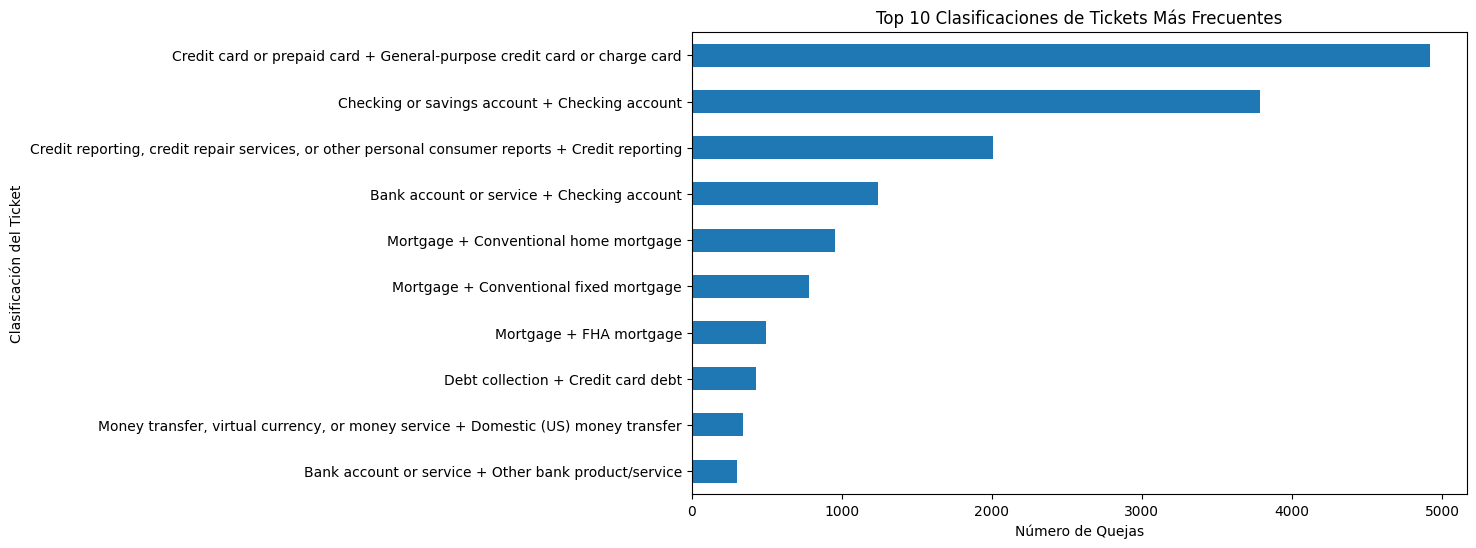

In [145]:
import matplotlib.pyplot as plt

ticket_counts.head(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Número de Quejas')
plt.ylabel('Clasificación del Ticket')
plt.title('Top 10 Clasificaciones de Tickets Más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

Interpretación:

- Las quejas relacionadas con tarjetas de crédito y cuentas corrientes son las más comunes.
- Los problemas con informes de crédito y hipotecas también son comunes.
- La empresa podría enfocarse para mejorar el servicio al cliente y reducir el número de quejas.

Vemos la longitud de los textos de las quejas

In [146]:
df['complaint_length'] = df['complaint_what_happened'].str.len()
df['complaint_length'].describe()

count    18963.000000
mean      1411.152349
std       1550.977004
min         19.000000
25%        536.000000
50%        999.000000
75%       1760.000000
max      31611.000000
Name: complaint_length, dtype: float64

complaint_length:

- count: 18,963 (número total de quejas analizadas).
- mean: 1,411.15 caracteres (longitud media de las quejas).
- std: 1,550.98 caracteres (desviación estándar, alta variabilidad).
- min: 19 caracteres (queja más corta).
- 25%: 536 caracteres (el 25% de las quejas tienen menos de 536 caracteres).
- 50% (mediana): 999 caracteres.
- 75%: 1,760 caracteres (el 75% de las quejas tienen menos de 1,760 caracteres).
- max: 31,611 caracteres (queja más larga).

Interpretación:

- La longitud de las quejas varía mucho, desde muy cortas (19 caracteres) hasta muy largas (más de 31,000 caracteres).
- La mediana de 999 caracteres indica que la mitad de las quejas tienen menos de 1,000 caracteres.
- La alta desviación estándar inidcA que hay quejas MUY largas que podrían afectar el análisis y el procesamiento de texto.
-   Veremos como afecta la variabilidad al preprocesar los datos para el modelado.

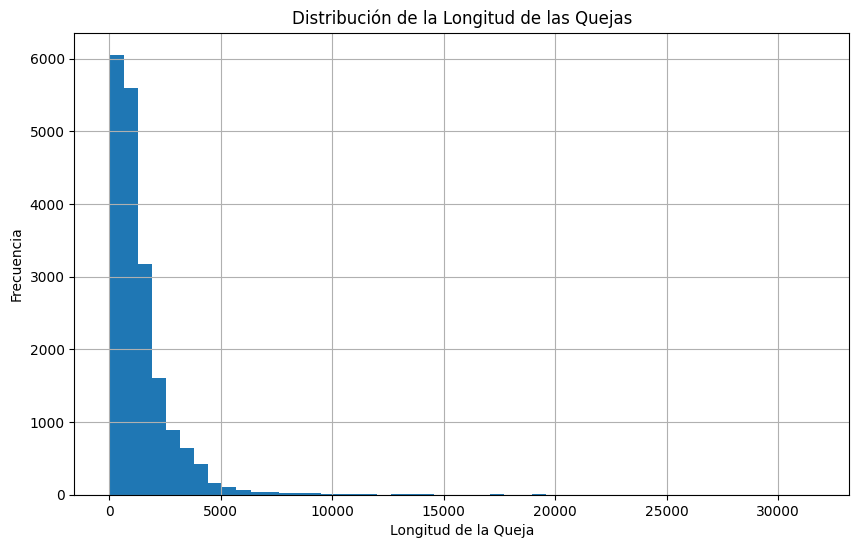

In [147]:
df['complaint_length'].hist(bins=50, figsize=(10,6))
plt.xlabel('Longitud de la Queja')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Quejas')
plt.show()

**Conclusiones Generales del EDA:**

1. **Diversidad en las Quejas:**  
   La mayoría de las quejas son únicas, las repetidas podrian ser del mismo usuario. Esto implica que el modelo debe ser capaz de manejar una variedad de temas y vocabulario.

2. **Áreas Principales de Quejas:**  
   Las categorías más frecuentes son:
   - Tarjetas de crédito y tarjetas prepagas.
   - Cuentas corrientes y de ahorro.
   - Informes de crédito y servicios de reparación de crédito.
   - Hipotecas.  
   
   Estas áreas son los principales puntos para los clientes y podrían ser utiles para mejorar los servicios y productos ofrecidos.

3. **Desbalance de Clases:**  
   Existe un desbalance en las clases de `ticket_classification`, con algunas categorías siendo mucho más frecuentes que otras. Esto deberiamos verlo durante el entrenamiento del modelo para evitar sesgos y mejorar la precisión en categorías menos representadas.

4. **Variabilidad en la Longitud de las Quejas:**  
   - Las quejas varían desde muy cortas hasta muuy largas.  
   - El preprocesamiento de texto deberá manejar eficientemente esta variabilidad, tal vez limitando la longitud máxima o utilizando técnicas que capturen información relevante independientemente de la longitud.

5. **Posibles Datos Duplicados:**  
   La existencia de una queja que aparece 11 veces sugiere posibles duplicados. Aunque el número es pequeño en relación al total de registros, podría ser beneficioso eliminar duplicados para mejorar la calidad del modelo.

**Implicaciones para el Modelado:**

- **Preprocesamiento de Texto:**
  - Limpiar y normalizar el texto (eliminar signos de puntuación, convertir a minúsculas, eliminar stopwords, etc.).
  - Considerar técnicas de lematización o stemming para reducir palabras a su forma base.
  - Manejar las quejas extremadamente largas y cortas, posiblemente estableciendo umbrales o utilizando padding/truncamiento.

- **Representación de Texto:**
  - Convertir el texto en representaciones numéricas utilizando técnicas como Bag of Words, TF-IDF, o embeddings como Word2Vec, GloVe, o modelos basados en Transformers (por ejemplo, BERT).

- **Manejo del Desbalance de Clases:**
  - Utilizar técnicas de resampling como sobremuestreo de clases minoritarias o submuestreo de clases mayoritarias.
  - Aplicar técnicas como penalización de clases en los algoritmos de aprendizaje o utilizar algoritmos robustos al desbalance de clases.

- **Selección de Modelos:**
  - Probar diferentes algoritmos de clasificación como Naive Bayes, Random Forest, Support Vector Machines, y modelos de Deep Learning.
  - Evaluar el desempeño con métricas adecuadas para clasificación multiclase y desbalanceada (por ejemplo, F1-score macro y weighted).

- **Validación Cruzada y Tuning de Hiperparámetros:**
  - Utilizar validación cruzada para obtener estimaciones más fiables del desempeño del modelo.
  - Realizar tuning de hiperparámetros utilizando técnicas como Grid Search o Random Search, posiblemente integrando con `mlflow` para el tracking de experimentos.


**Siguientes Pasos:**

1. **Ingeniería de Características y Preprocesamiento:**
   - Implementar las técnicas de preprocesamiento mencionadas.
   - Convertir el texto a una representación numérica adecuada.

2. **Entrenamiento y Evaluación de Modelos:**
   - Entrenar al menos dos modelos diferentes.
   - Realizar tuning de hiperparámetros para cada modelo.
   - Utilizar `mlflow` para el tracking de experimentos y registrar los modelos.

3. **Selección de Modelos Champion y Challenger:**
   - Seleccionar el modelo con mejor desempeño como Champion.
   - Seleccionar el segundo mejor modelo como Challenger.
   - Registrar ambos modelos en el Model Registry de `mlflow`.

4. **Implementación de la API y Frontend:**
   - Desplegar el modelo Champion mediante una API utilizando `fastapi` u otro framework.
   - Desarrollar un frontend sencillo con `streamlit` u otro framework para interactuar con la API.

5. **Orquestación y Contenerización:**
   - Crear un script con Prefect para orquestar el flujo de entrenamiento y registro de modelos.
   - Utilizar `docker-compose` para crear contenedores de la API y el frontend.

# Feature Engineering y Preprocesamiento de Datos

Preprocesaremos el texto y convertiremos las quejas en una representación numérica que pueda ser utilizada por algoritmos de machine learning.

In [148]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
# Descargar las stopwords y el lematizador de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Funcion para preprocesar y limpiar el texto de las quejas

In [150]:
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar URLs y direcciones de correo electrónico
    text = re.sub(r'http\S+|www.\S+|@\S+', '', text)
    
    # Eliminar números y caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenización
    tokens = text.split()
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstruir el texto
    text = ' '.join(tokens)
    return text

In [151]:
#Aplicamos la función de preprocesamiento a la columna complaint_what_happened.
df['clean_complaint'] = df['complaint_what_happened'].apply(preprocess_text)

In [152]:
# Observamos algunas filas para verificar que el preprocesamiento se realizó correctamente.
df[['complaint_what_happened', 'clean_complaint']]

,complaint_what_happened,clean_complaint
0,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate could h...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgraded xxxx xxxx card xxxx told agent upgrad...
2,Chase Card was reported on XX/XX/2019. However...,chase card reported xxxx however fraudulent ap...
3,"On XX/XX/2018, while trying to book a XXXX XX...",xxxx trying book xxxx xxxx ticket came across ...
4,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...
...,...,...
18958,My husband passed away. Chase bank put check o...,husband passed away chase bank put check hold ...
18959,After being a Chase Card customer for well ove...,chase card customer well decade offered multip...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx called chas xxxx xxxx visa ...
18961,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...


In [163]:
# Ver todas las clases de ticket_classification
df['ticket_classification'].unique()

array(['Debt collection + Credit card debt',
       'Credit card or prepaid card + General-purpose credit card or charge card',
       'Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report',
       'Credit reporting, credit repair services, or other personal consumer reports + Credit reporting',
       'Checking or savings account + Checking account',
       'Vehicle loan or lease + Loan',
       'Money transfer, virtual currency, or money service + Domestic (US) money transfer',
       'Checking or savings account + Savings account',
       'Mortgage + Conventional home mortgage',
       'Mortgage + Home equity loan or line of credit (HELOC)',
       'Student loan + Private student loan',
       'Debt collection + I do not know', 'Consumer Loan + Vehicle loan',
       'Mortgage + FHA mortgage',
       'Money transfer, virtual currency, or money service + Mobile or digital wallet',
       'Money transfer, virtual currency, or mon

In [164]:
# Ver cuántas clases únicas hay
df['ticket_classification'].nunique()

78

In [61]:
# Dividir el dataset en train test split
X = df['clean_complaint']
y = df['ticket_classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [62]:
# Convertimos el texto a vectores numericos usando TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [63]:
# Guardamos los datos preprocesados y el vectorizador para usarlos cuando entrenemos el modelo
import pickle

In [64]:
import os

# Crear la carpeta processed_data si no existe
os.makedirs('data/processed_data', exist_ok=True)

# Guardar los datos
with open('data/processed_data/X_train_tfidf.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)
    
with open('data/processed_data/X_test_tfidf.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

In [65]:
# Guardar las etiquetas
y_train.to_csv('data/processed_data/y_train.csv', index=False)
y_test.to_csv('data/processed_data/y_test.csv', index=False)

# Crear la carpeta models si no existe
os.makedirs('models', exist_ok=True)

# Guardar el vectorizador
with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

- Preprocesamiento de Texto: Limpiamos el texto eliminando URLs, correos electrónicos, números y caracteres especiales. Convertimos el texto a minúsculas, eliminamos stopwords y aplicamos lematización.
- Vectorización: Convertimos el texto preprocesado en una matriz de características numéricas utilizando TF-IDF.
- División de Datos: Separamos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo,
- Guardar los Datos: Guardamos los datos procesados y el vectorizador para facilitar el entrenamiento de modelos.

### Entrenar modelos y tracking de Experimentos con MLflow

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import mlflow
import mlflow.sklearn

In [67]:
import dagshub
dagshub.init(repo_owner='zapatacc', repo_name='final-exam-pcd2024-autumn', mlflow=True)

Initialized MLflow to track repo "zapatacc/final-exam-pcd2024-autumn"

Repository zapatacc/final-exam-pcd2024-autumn initialized!

In [68]:
# Configuramos mlflow para el tracking de experimentos con DagsHub
# URI de tracking de MLflow
mlflow.set_tracking_uri('https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow')  

# Establecemos el nombre del experimento siguiendo el formato 'nombre-nombre-del-algoritmo'
experiment_name_logreg = 'diego-mercado-logistic-regression'
experiment_name_rf = 'diego-mercado-random-forest'

In [69]:
# export MLFLOW_TRACKING_USERNAME='diego-mercadoc'
# export MLFLOW_TRACKING_PASSWORD='e724448e1845c324164d75bb978ad9c472a35a9f'

In [70]:
# Funcion de entrenamiento y tracking para trackear parametros y metricas y registrar modelo en mlflow
def train_model(model, model_name, params, experiment_name):
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=model_name):
        # Entrenamiento del modelo
        model.set_params(**params)
        model.fit(X_train_tfidf, y_train)
        
        # Predicciones
        y_pred = model.predict(X_test_tfidf)
        
        # Métricas
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Logging de parámetros y métricas
        mlflow.log_params(params)
        mlflow.log_metric('accuracy', accuracy)
        
        # Logging del modelo
        mlflow.sklearn.log_model(model, model_name)
        
        # Imprimir resultados
        print(f"Modelo: {model_name}")
        print(f"Accuracy: {accuracy}")

In [71]:
# Definir los modelos y los hiperparametros qye vamos a probar
# Modelo 1: Regresión Logística
logreg = LogisticRegression(max_iter=1000)

logreg_params = {
    'C': 1.0,
    'penalty': 'l2',
    'solver': 'lbfgs'
}

# Modelo 2: Bosque Aleatorio
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2
}

In [72]:
# bash para startear mlflow en la terminal
# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlflow-artifacts --host

In [73]:
# from mlflow.tracking import MlflowClient

# client = MlflowClient()

In [74]:
# # Crear el experimento si no existe
# if not mlflow.get_experiment_by_name(experiment_name_logreg):
# 	mlflow.create_experiment(experiment_name_logreg)
# 	#client.create_experiment(name=experiment_name_logreg)

# if not mlflow.get_experiment_by_name(experiment_name_rf):
# 	mlflow.create_experiment(experiment_name_rf)
# 	#client.create_experiment(name=experiment_name_rf)

In [75]:
# Entrenamos los modelos usando la función train_model
# Entrenar Regresión Logística
train_model(logreg, 'Logistic Regression Baseline', logreg_params, experiment_name_logreg)

# Entrenar Bosque Aleatorio
train_model(rf, 'Random Forest Baseline', rf_params, experiment_name_rf)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Modelo: Logistic Regression Baseline
Accuracy: 0.5676245715792249


2024/11/20 14:56:38 INFO mlflow.tracking.fluent: Experiment with name 'diego-mercado-random-forest' does not exist. Creating a new experiment.
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-de

Modelo: Random Forest Baseline
Accuracy: 0.5502240970208279


In [76]:
# Tuneamos los hiperparametros para cada modelo y registramos los experimentos en mlflow

In [77]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Tuning para regresiob logistica

In [78]:
logreg_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_logreg = GridSearchCV(logreg, logreg_param_grid, cv=3, n_jobs=-1, scoring='accuracy')

mlflow.set_experiment(experiment_name_logreg)

with mlflow.start_run(run_name='Logistic Regression Hyperparameter Tuning'):
    grid_logreg.fit(X_train_tfidf, y_train)
    
    # Mejor modelo
    best_logreg = grid_logreg.best_estimator_
    best_params = grid_logreg.best_params_
    best_score = grid_logreg.best_score_
    
    # Predicciones en el conjunto de prueba
    y_pred_logreg = best_logreg.predict(X_test_tfidf)
    test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    
    # Logging
    mlflow.log_params(best_params)
    mlflow.log_metric('best_cv_accuracy', best_score)
    mlflow.log_metric('test_accuracy', test_accuracy_logreg)
    mlflow.sklearn.log_model(best_logreg, 'Best Logistic Regression Model')
    
    print("Best Logistic Regression Model:")
    print(f"Parameters: {best_params}")
    print(f"Cross-Validation Accuracy: {best_score}")
    print(f"Test Accuracy: {test_accuracy_logreg}")

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
2024/11/20 15:06:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 15:06:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Hyperparameter Tuning at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/646f6d69165e4610b1afc9d30d0e81cd.
2024/11/20 15:06:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0.


Best Logistic Regression Model:
Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-Validation Accuracy: 0.5740932587907142
Test Accuracy: 0.5636699182704983


In [ ]:
# Tuning para random forest

In [79]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, rf_param_grid, cv=3, n_jobs=-1, scoring='accuracy')

mlflow.set_experiment(experiment_name_rf)

with mlflow.start_run(run_name='Random Forest Hyperparameter Tuning'):
    grid_rf.fit(X_train_tfidf, y_train)
    
    # Mejor modelo
    best_rf = grid_rf.best_estimator_
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    # Predicciones en el conjunto de prueba
    y_pred_rf = best_rf.predict(X_test_tfidf)
    test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
    
    # Logging
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('best_cv_accuracy', best_score_rf)
    mlflow.log_metric('test_accuracy', test_accuracy_rf)
    mlflow.sklearn.log_model(best_rf, 'Best Random Forest Model')
    
    print("Best Random Forest Model:")
    print(f"Parameters: {best_params_rf}")
    print(f"Cross-Validation Accuracy: {best_score_rf}")
    print(f"Test Accuracy: {test_accuracy_rf}")

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
2024/11/20 15:08:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 15:21:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Hyperparameter Tuning at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1/runs/3a1b87e2e33343ac9e49fb1eb7aef998.
2024/11/20 15:21:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1.


Best Random Forest Model:
Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Accuracy: 0.55293296973573
Test Accuracy: 0.5475876614816768


In [ ]:
# Sleccionamos el modelo Champion y el Challenger (primero y segundo mejor modelo)

In [81]:
if test_accuracy_logreg > test_accuracy_rf:
    champion_model = best_logreg
    challenger_model = best_rf
    champion_name = 'Best Logistic Regression Model'
    challenger_name = 'Best Random Forest Model'
else:
    champion_model = best_rf
    challenger_model = best_logreg
    champion_name = 'Best Random Forest Model'
    challenger_name = 'Best Logistic Regression Model'

print(f"Champion Model: {champion_name}")
print(f"Challenger Model: {challenger_name}")

Champion Model: Best Logistic Regression Model
Challenger Model: Best Random Forest Model


In [ ]:
# Registramos los modelos en el model registry de mlflow con los nombres correspondientes

In [83]:
# Iniciar una nueva corrida de MLflow
with mlflow.start_run() as run:
    # Registrar el modelo Champion
    result_champion = mlflow.register_model(
        model_uri=f"runs:/{run.info.run_id}/{champion_name}",
        name='tu-nombre-modelo'
    )

    # Registrar el modelo Challenger
    result_challenger = mlflow.register_model(
        model_uri=f"runs:/{run.info.run_id}/{challenger_name}",
        name='tu-nombre-modelo-challenger'
    )

Successfully registered model 'tu-nombre-modelo'.
2024/11/20 15:25:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tu-nombre-modelo, version 1
Created version '1' of model 'tu-nombre-modelo'.
Successfully registered model 'tu-nombre-modelo-challenger'.
2024/11/20 15:25:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tu-nombre-modelo-challenger, version 1
Created version '1' of model 'tu-nombre-modelo-challenger'.
2024/11/20 15:25:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run salty-roo-900 at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1/runs/a5e6a1a0c00841a3adc3ff3e32ec0f7c.
2024/11/20 15:25:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1.


#### Interpretaciones

**UndefinedMetricWarning:**

- Interpretación: Esta advertencia indica que, durante el cálculo de las métricas de precisión, algunas clases no fueron predichas por el modelo. Como resultado, la precisión para esas clases es indefinida y se establece en 0.0.
- Causa Probable: Es posible que haya un desbalance en las clases de ticket_classification, donde algunas clases tienen muy pocos ejemplos o incluso solo uno. Esto hace que el modelo tenga dificultades para aprender y predecir esas clases minoritarias.
- Implicaciones: Las métricas globales pueden estar sesgadas, y el modelo podría estar ignorando clases importantes pero poco representada


**Resultados del Entrenamiento:**

- Modelo: Logistic Regression Baseline

Accuracy: 0.5676 (56.76%)

- Modelo: Random Forest Baseline

Accuracy: 0.5502 (55.02%)


Ambos modelos presentan un desempeño moderado, con la Regresión Logística ligeramente mejor que el Bosque Aleatorio en esta etapa inicial.
Las advertencias sugieren que hay problemas con la predicción de ciertas clases, lo cual deberemo corregir.


**Tuning de Hiperparámetros de logistic regression:**

- Interpretación: Durante la validación cruzada (cross-validation), se detectó que la clase menos representada tiene solo un ejemplo, lo cual es menor que el número de divisiones (n_splits=3) utilizado en la validación.
- Causa Probable: Desbalance muy severo en las clases, con algunas teniendo muy pocos ejemplos.
- Implicaciones: La validación cruzada puede no ser fiable para esas clases, ya que en algunas particiones podrían no estar presentes, afectando la estimación del desempeño del modelo.


Resultados del Tuning:

Mejores Parámetros:

- C: 10.0
- penalty: 'l2'
- solver: 'lbfgs'

Cross-Validation Accuracy: 0.5741 (57.41%)

Test Accuracy: 0.5637 (56.37%)

El tuning mejoró ligeramente el desempeño del modelo en comparación con el baseline.
La precisión se mantiene en un nivel moderado, lo que parece que el modelo aún tiene dificultades para generalizar correctamente.


**Tuning de Hiperparámetros de Random Forest:**

Interpretación: Misma que en el Output 2. La validación cruzada está afectada por el desbalance de clases.

Resultados del Tuning:

Mejores Parámetros:

- n_estimators: 200
- max_depth: None
- min_samples_split: 2

Cross-Validation Accuracy: 0.5529 (55.29%)

Test Accuracy: 0.5476 (54.76%)

El tuning no mejoró significativamente el desempeño del Bosque Aleatorio.
La precisión es ligeramente menor que la obtenida con Regresión Logística.

- Basado en el desempeño en el test, el modelo de Regresión Logística es seleccionado como Champion debido a su mayor precisión.
- El modelo de Random Forest es seleccionado como Challenger.


### Conclusiones del entrenamiento de modelos

Hemos entrenado dos modelos diferentes y realizado tuning de hiperparámetros para cada uno. Utilizando mlflow, hemos realizado el tracking de los experimentos, registrado las métricas y parámetros, y almacenado los modelos en el Model Registry.


Técnicas de Resampling:
- Sobremuestreo de Clases Minoritarias: Utilizar métodos como SMOTE para generar ejemplos sintéticos.
- Submuestreo de Clases Mayoritarias: Reducir el número de ejemplos de las clases más comunes.


Algoritmos y Métricas Adecuadas:
- Utilizar modelos que sean robustos ante el desbalance de clases.
- Emplear métricas como el F1-score macro o weighted para evaluar el desempeño.


Métricas de Evaluación:

- Observación: La precisión (accuracy) puede no ser la mejor métrica en problemas con desbalance de clases.

Recomendaciones:
- Evaluar con Otras Métricas:
- Matriz de Confusión: Para visualizar el desempeño por clase.
- Reporte de Clasificación: Incluye precisión, recall y F1-score por clase.
- Curvas ROC y AUC: Si es aplicable.


Mejorar el Preprocesamiento y Representación de Datos:

Posibles Mejoras:

-Explorar Diferentes Técnicas de Vectorización:
-Probar con embeddings más avanzados como Word2Vec, GloVe o BERT.


Validación Cruzada Estratificada:

- Problema Identificado: La validación cruzada está afectada por el desbalance de clases.

Recomendación:

- Utilizar StratifiedKFold en lugar de KFold para asegurar que cada fold tenga una representación proporcional de cada clase.


Próximos Pasos

Ahora que tenemos los modelos entrenados y registrados, podemos proceder a:

Crear un script con Prefect que orqueste el flujo de entrenamiento y registro de modelos.
Desarrollar una API utilizando fastapi para servir el modelo Champion.
Crear un frontend con streamlit para interactuar con la API.
Contenerizar la aplicación utilizando docker-compose.

Continuar con el Pipeline de Deployment:

Siguientes Pasos:

- Crear el script con Prefect para orquestar el flujo.
- Desarrollar la API con FastAPI para servir el modelo Champion.
- Construir el frontend con Streamlit.
- Contenerizar la aplicación con Docker y gestionar los contenedores con docker-compose.

##### Mejoras para el desbalance de clases y mejorar el modelo

- Resampling (SMPOTE)
- Modelos robustos al desbalance de clases
- Metricas adecuadas al desbalance de dclases
- Stratified cross-validation
- Otras tecnicas de vectorizacion (Word2Vec, GloVe)

In [85]:
# Instalación de imbalanced-learn
#!pip install imbalanced-learn gensim

In [116]:
# Instalación de imbalanced-learn y gensim si es necesario
# !pip install imbalanced-learn gensim

# Importación de librerías adicionales
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
import mlflow
import mlflow.sklearn

In [ ]:
# # Filtrar clases con menos ejemplos que el número de vecinos (k_neighbors)
# min_samples = 3
# filtered_indices = y_train.value_counts()[y_train.value_counts() >= min_samples].index
# X_train_filtered = X_train[y_train.isin(filtered_indices)]
# y_train_filtered = y_train[y_train.isin(filtered_indices)]

# # Aplicar SMOTE al conjunto filtrado
# smote = SMOTE(random_state=11, n_jobs=-1, k_neighbors=3)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)

# # Verificar las distribuciones de las clases después del sobremuestreo
# print("Distribución de clases después de filtrar y aplicar SMOTE:")
# print(pd.Series(y_train_resampled).value_counts())

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# # Crear un pipeline con SMOTE y submuestreo
# smote = SMOTE(random_state=11, k_neighbors=3)
# undersample = RandomUnderSampler(random_state=11)

# resample_pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
# X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train_tfidf, y_train)

# # Verificar la distribución de clases
# print("Distribución de clases después del pipeline de resampling:")
# print(pd.Series(y_train_resampled).value_counts())

In [168]:
# Ver las clases en y
y.unique()

array(['Debt collection + Credit card debt',
       'Credit card or prepaid card + General-purpose credit card or charge card',
       'Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report',
       'Credit reporting, credit repair services, or other personal consumer reports + Credit reporting',
       'Checking or savings account + Checking account',
       'Vehicle loan or lease + Loan',
       'Money transfer, virtual currency, or money service + Domestic (US) money transfer',
       'Checking or savings account + Savings account',
       'Mortgage + Conventional home mortgage',
       'Mortgage + Home equity loan or line of credit (HELOC)',
       'Student loan + Private student loan',
       'Debt collection + I do not know', 'Consumer Loan + Vehicle loan',
       'Mortgage + FHA mortgage',
       'Money transfer, virtual currency, or money service + Mobile or digital wallet',
       'Money transfer, virtual currency, or mon

In [169]:
y.nunique()

78

In [ ]:
# Assuming that 'df' is already loaded and preprocessed

# Define X and y
X = df['clean_complaint']
y = df['ticket_classification']

# Encode labels before splitting
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=11
)

# Vectorize the text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Fitteando el Laabel encoder en toda la vatriable objetivo y, antes de splittear, te aseguras de que todas las etiquetas esten contabilizadas y evitas el ValueError causado por etiquetas no vistas durante la transformacion.

In [171]:
# Crear el pipeline con SMOTE y RandomUnderSampler
# Filtrar clases con menos ejemplos que el mínimo requerido para SMOTE
min_samples = 3
class_counts = np.bincount(y_train_encoded)
valid_classes = np.where(class_counts >= min_samples)[0]

# Filtrar las clases válidas
filtered_indices = np.isin(y_train_encoded, valid_classes)
X_train_filtered = X_train_tfidf[filtered_indices]
y_train_filtered = y_train_encoded[filtered_indices]

print("Distribución de clases después del filtrado inicial:")
print(pd.Series(y_train_filtered).value_counts())


Distribución de clases después del filtrado inicial:
15    3975
6     3028
22    1595
2      990
52     745
      ... 
32       3
65       3
60       3
11       3
39       3
Name: count, Length: 65, dtype: int64


In [172]:
# Crear el pipeline con SMOTE y RandomUnderSampler
smote = SMOTE(random_state=11, k_neighbors=2)
undersample = RandomUnderSampler(random_state=11)

resample_pipeline = Pipeline(steps=[
    ('smote', smote),
    ('undersample', undersample)
])

# Aplicar el pipeline
X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train_filtered, y_train_filtered)

# Verificar la distribución después del resampling
print("Distribución de clases después del resampling:")
print(pd.Series(y_train_resampled).value_counts())

Distribución de clases después del resampling:
0     3975
38    3975
40    3975
41    3975
42    3975
      ... 
30    3975
31    3975
32    3975
33    3975
77    3975
Name: count, Length: 65, dtype: int64


- SMOTE no puede generar muestras sintéticas porque algunas clases minoritarias tienen menos ejemplos que el número de vecinos (n_neighbors=6) que intenta utilizar el algoritmo por defecto. - Esto ocurre cuando una clase tiene muy pocos ejemplos en el conjunto de entrenamiento.

- **Reducimos el valor de k_neighbors en el objeto SMOTE para adaptarlo al tamaño de las clases más pequeñas.**

- **Filtrar Clases con Muy Pocos Ejemplos**
Si algunas clases tienen menos ejemplos que el valor mínimo requerido para k_neighbors, las eliminamos del dataset, ya que no tienen suficiente información para entrenar correctamente al modelo.

**Dado el contexto y la necesidad de arreglar el dataset desbalanceado de forma profesional, podemos combinar ambas estrategias para maximizar el impacto. Primero filtramos las clases extremadamente raras (con menos de 3 ejemplos, ya que no son representativas) y luego aplicamos un pipeline que incluye SMOTE para sobremuestrear y RandomUnderSampler para submuestrear las clases mayoritarias.**

Beneficio de Esta Combinación:

- Elimina el ruido causado por clases extremadamente raras.
- Mantiene una representación balanceada del conjunto de datos al final del proceso.
- Mejora la estabilidad de los modelos durante el entrenamiento y la evaluación.

In [173]:
# Crear una validación cruzada estratificada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)

In [177]:
# Actualizamos las funciones de entrenamiento y evaluacion de los modelos para incluir las nuevas tecnicas y metricas

def train_model_improved(model, model_name, params, experiment_name, X_train, y_train, X_test, y_test):
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=model_name):
        # Entrenamiento del modelo
        model.set_params(**params)
        model.fit(X_train, y_train)
        
        # Predicciones
        y_pred = model.predict(X_test)
        
        # Métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
        f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # Obtener todas las etiquetas posibles
        all_labels = label_encoder.transform(label_encoder.classes_)
        
        # Reporte de clasificación
        report = classification_report(
            y_test,
            y_pred,
            labels=all_labels,
            target_names=label_encoder.classes_,
            zero_division=0
        )
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred, labels=all_labels)
        
        # Logging de parámetros y métricas
        mlflow.log_params(params)
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('f1_macro', f1_macro)
        mlflow.log_metric('f1_weighted', f1_weighted)
        
        # Logging del modelo
        mlflow.sklearn.log_model(model, model_name)
        
        # Imprimir resultados
        print(f"Modelo: {model_name}")
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score (Macro): {f1_macro}")
        print(f"F1 Score (Weighted): {f1_weighted}")
        print("\nReporte de Clasificación:")
        print(report)
        print("\nMatriz de Confusión:")
        print(cm)

##### Entrenamiento de Modelos con Datos Balanceados resampleados

In [178]:
# Modelo 1: Regresión Logística
logreg = LogisticRegression(max_iter=1000)

logreg_params = {
    'C': 1.0,
    'penalty': 'l2',
    'solver': 'lbfgs'
}

# Modelo 2: Bosque Aleatorio
rf = RandomForestClassifier(random_state=11)

rf_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2
}

##### Entrenar los modelos actualizados con los datos balanceados

Si especificas explícitamente el parámetro de etiquetas en tus llamadas a classification_report y confusion_matrix, resuelves el error causado por la discrepancia en el número de clases y aseguras que tus métricas de evaluación sean completas y consistentes.

In [179]:
# # Codificar las etiquetas para el conjunto de entrenamiento y prueba
# label_encoder = LabelEncoder()
# y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
# y_test_encoded = label_encoder.fit_transform(y_test)  # Use fit_transform instead of transform

# Entrenar Regresión Logística Mejorada
train_model_improved(
    logreg,
    'Logistic Regression Improved',
    logreg_params,
    experiment_name_logreg,
    X_train_resampled,
    y_train_resampled,
    X_test_tfidf,
    y_test_encoded
)

# Entrenar Bosque Aleatorio Mejorado
train_model_improved(
    rf,
    'Random Forest Improved',
    rf_params,
    experiment_name_rf,
    X_train_resampled,
    y_train_resampled,
    X_test_tfidf,
    y_test_encoded
)

2024/11/20 17:36:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 17:36:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Improved at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/b87a8e8ec00d45609ad2c8fe0ddb3e58.
2024/11/20 17:36:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0.


Modelo: Logistic Regression Improved
Accuracy: 0.5217505931979963
F1 Score (Macro): 0.17635517133639353
F1 Score (Weighted): 0.5286164002557557

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         7
                                                 Bank account or service + Cashing a check without an account       0.25      0.25      0.25         4
                                                                   Bank account or service + Checking account       0.41      0.48      0.44       252
                                                         Bank account or service + Other bank product/service       0.12      0.16      0.14        73
                                                                    Bank 

2024/11/20 17:52:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 18:08:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Improved at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1/runs/2bcb1c074b2d4ab7908a5faa398adcdf.


Modelo: Random Forest Improved
Accuracy: 0.5670972844713946
F1 Score (Macro): 0.1310945463152175
F1 Score (Weighted): 0.5060760658402877

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         7
                                                 Bank account or service + Cashing a check without an account       0.00      0.00      0.00         4
                                                                   Bank account or service + Checking account       0.41      0.13      0.20       252
                                                         Bank account or service + Other bank product/service       0.00      0.00      0.00        73
                                                                    Bank account

2024/11/20 18:08:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1.


##### Hyperparameter Tuning con Cross-Validation Estratificada (Stratified-Cross-Validation)

In [182]:
logreg_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_logreg = GridSearchCV(
    logreg,
    logreg_param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='f1_weighted'
)

mlflow.set_experiment(experiment_name_logreg)

with mlflow.start_run(run_name='Logistic Regression Hyperparameter Tuning Improved'):
    grid_logreg.fit(X_train_resampled, y_train_resampled)
    
    # Mejor modelo
    best_logreg = grid_logreg.best_estimator_
    best_params = grid_logreg.best_params_
    best_score = grid_logreg.best_score_
    
    # Predicciones en el conjunto de prueba
    y_pred_logreg = best_logreg.predict(X_test_tfidf)
    test_accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
    f1_macro_logreg = f1_score(y_test_encoded, y_pred_logreg, average='macro', zero_division=0)
    f1_weighted_logreg = f1_score(y_test_encoded, y_pred_logreg, average='weighted', zero_division=0)

    # Obtener todas las etiquetas posibles
    all_labels = label_encoder.transform(label_encoder.classes_)
    
    # Reporte de clasificación
    report_logreg = classification_report(y_test_encoded, y_pred_logreg, labels=all_labels, target_names=label_encoder.classes_, zero_division=0)
    
    # Matriz de confusión
    cm_logreg = confusion_matrix(y_test_encoded, y_pred_logreg, labels=all_labels)
    
    # Logging
    mlflow.log_params(best_params)
    mlflow.log_metric('best_cv_f1_weighted', best_score)
    mlflow.log_metric('test_accuracy', test_accuracy_logreg)
    mlflow.log_metric('test_f1_macro', f1_macro_logreg)
    mlflow.log_metric('test_f1_weighted', f1_weighted_logreg)
    mlflow.sklearn.log_model(best_logreg, 'Best Logistic Regression Model Improved')
    
    print("Best Logistic Regression Model Improved:")
    print(f"Parameters: {best_params}")
    print(f"Best CV F1 Weighted: {best_score}")
    print(f"Test Accuracy: {test_accuracy_logreg}")
    print(f"Test F1 Score (Macro): {f1_macro_logreg}")
    print(f"Test F1 Score (Weighted): {f1_weighted_logreg}")
    print("\nReporte de Clasificación:")
    print(report_logreg)
    print("\nMatriz de Confusión:")
    print(cm_logreg)

2024/11/20 19:30:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 19:30:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Hyperparameter Tuning Improved at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/938ee556c2334b17b0c6da44468039b2.
2024/11/20 19:30:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0.


Best Logistic Regression Model Improved:
Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV F1 Weighted: 0.9863221257479694
Test Accuracy: 0.5322963353546005
Test F1 Score (Macro): 0.1596254468158286
Test F1 Score (Weighted): 0.5243932222572044

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         7
                                                 Bank account or service + Cashing a check without an account       0.50      0.25      0.33         4
                                                                   Bank account or service + Checking account       0.37      0.41      0.39       252
                                                         Bank account or service + Other bank product/serv

In [183]:
# Tuning para random forest

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    rf,
    rf_param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='f1_weighted'
)

mlflow.set_experiment(experiment_name_rf)

with mlflow.start_run(run_name='Random Forest Hyperparameter Tuning Improved'):
    grid_rf.fit(X_train_resampled, y_train_resampled)
    
    # Mejor modelo
    best_rf = grid_rf.best_estimator_
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    # Predicciones en el conjunto de prueba
    y_pred_rf = best_rf.predict(X_test_tfidf)
    test_accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
    f1_macro_rf = f1_score(y_test_encoded, y_pred_rf, average='macro', zero_division=0)
    f1_weighted_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted', zero_division=0)

    # Obtener todas las etiquetas posibles
    all_labels = label_encoder.transform(label_encoder.classes_)
    
    # Reporte de clasificación
    report_rf = classification_report(y_test_encoded, y_pred_rf, labels=all_labels, target_names=label_encoder.classes_, zero_division=0)
    
    # Matriz de confusión
    cm_rf = confusion_matrix(y_test_encoded, y_pred_rf, labels=all_labels)
    
    # Logging
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('best_cv_f1_weighted', best_score_rf)
    mlflow.log_metric('test_accuracy', test_accuracy_rf)
    mlflow.log_metric('test_f1_macro', f1_macro_rf)
    mlflow.log_metric('test_f1_weighted', f1_weighted_rf)
    mlflow.sklearn.log_model(best_rf, 'Best Random Forest Model Improved')
    
    print("Best Random Forest Model Improved:")
    print(f"Parameters: {best_params_rf}")
    print(f"Best CV F1 Weighted: {best_score_rf}")
    print(f"Test Accuracy: {test_accuracy_rf}")
    print(f"Test F1 Score (Macro): {f1_macro_rf}")
    print(f"Test F1 Score (Weighted): {f1_weighted_rf}")
    print("\nReporte de Clasificación:")
    print(report_rf)
    print("\nMatriz de Confusión:")
    print(cm_rf)

2024/11/20 20:45:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 21:07:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Hyperparameter Tuning Improved at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1/runs/adbfdfdb91fc41939190f24de37cd1b4.
2024/11/20 21:07:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/1.


Best Random Forest Model Improved:
Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1 Weighted: 0.9890423476702477
Test Accuracy: 0.5723701555496968
Test F1 Score (Macro): 0.13619744736903636
Test F1 Score (Weighted): 0.5097552350772798

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         7
                                                 Bank account or service + Cashing a check without an account       0.00      0.00      0.00         4
                                                                   Bank account or service + Checking account       0.41      0.12      0.18       252
                                                         Bank account or service + Other bank 

##### Usamos Word2Vec para representar el texto de las quejas en vectores numéricos.

In [184]:
# Tokenizar el texto preprocesado
df['tokens'] = df['clean_complaint'].apply(lambda x: x.split())

# Entrenar el modelo Word2Vec
w2v_model = Word2Vec(
    sentences=df['tokens'],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1,  # Usar Skip-Gram; cambiar a 0 para CBOW
    seed=11
)

##### Funcion para obtener el vector promedio de las palabras en cada queja Usando Word2Vec

In [185]:
def vectorize_text(tokens, model):
    # Filtrar palabras que están en el vocabulario del modelo
    tokens = [word for word in tokens if word in model.wv.key_to_index]
    if len(tokens) > 0:
        return np.mean(model.wv[tokens], axis=0)
    else:
        return np.zeros(model.vector_size)

##### Primer snippet del intento 1

### Intento 2

----

##### Tokenizar y vectorizar antes de resamplear

In [249]:
# Tokenize X_train
X_train_tokens = X_train.apply(lambda x: x.split())

# Vectorize tokens using Word2Vec
X_train_vectors = np.array([vectorize_text(tokens, w2v_model) for tokens in X_train_tokens])

In [250]:
# Filter classes with at least min_samples
min_samples = 3
class_counts = np.bincount(y_train_encoded)
valid_classes = np.where(class_counts >= min_samples)[0]

# Filter the data
filtered_indices = np.isin(y_train_encoded, valid_classes)
X_train_vectors_filtered = X_train_vectors[filtered_indices]
y_train_filtered = y_train_encoded[filtered_indices]

In [251]:
# Apply SMOTE and RandomUnderSampler
smote = SMOTE(random_state=11, k_neighbors=2)
undersample = RandomUnderSampler(random_state=11)

resample_pipeline = Pipeline(steps=[
    ('smote', smote),
    ('undersample', undersample)
])

X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train_vectors_filtered, y_train_filtered)

In [252]:
# Tokenize and vectorize X_test
X_test_tokens = X_test.apply(lambda x: x.split())
X_test_vectors = np.array([vectorize_text(tokens, w2v_model) for tokens in X_test_tokens])

##### Entrenar los modelos usando datos resampleados

##### Entrenar regresion logistica con Word2Vec

In [253]:
train_model_improved(
    logreg,
    'Logistic Regression with Word2Vec',
    logreg_params,
    experiment_name_logreg,
    X_train_resampled,
    y_train_resampled,
    X_test_vectors,
    y_test_encoded
)

2024/11/20 22:16:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 22:16:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression with Word2Vec at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/13/runs/b4acfbbc59f84ae19aa507ea72c47298.
2024/11/20 22:16:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/13.


Modelo: Logistic Regression with Word2Vec
Accuracy: 0.2655590717299578
F1 Score (Macro): 0.13736004865473986
F1 Score (Weighted): 0.33119839740089013

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         4
                                                 Bank account or service + Cashing a check without an account       0.03      0.25      0.05         4
                                                                   Bank account or service + Checking account       0.34      0.24      0.28       249
                                                         Bank account or service + Other bank product/service       0.07      0.08      0.07        60
                                                                   

##### Entrenar Random Forest con Word2Vec

In [254]:
train_model_improved(
    rf,
    'Random Forest with Word2Vec',
    rf_params,
    experiment_name_rf,
    X_train_resampled,
    y_train_resampled,
    X_test_vectors,
    y_test_encoded
)

2024/11/20 22:16:04 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest Experiment' does not exist. Creating a new experiment.
2024/11/20 22:24:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 22:42:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest with Word2Vec at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/14/runs/6a6a18765190490cb1d255281f3b7938.
2024/11/20 22:42:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/14.


Modelo: Random Forest with Word2Vec
Accuracy: 0.5274261603375527
F1 Score (Macro): 0.13593745206442737
F1 Score (Weighted): 0.49897081569482554

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         4
                                                 Bank account or service + Cashing a check without an account       0.00      0.00      0.00         4
                                                                   Bank account or service + Checking account       0.25      0.27      0.26       249
                                                         Bank account or service + Other bank product/service       0.06      0.02      0.03        60
                                                                    Bank 

In [257]:
# Entrenar Regresión Logística Mejorada con Word2Vec con los mejores hiperparámetros
train_model_improved(
    best_logreg,
    'Best Logistic Regression with Word2Vec',
    best_params,
    experiment_name_logreg,
    X_train_resampled,
    y_train_resampled,
    X_test_vectors,
    y_test_encoded
)

2024/11/20 22:45:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 22:45:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Best Logistic Regression with Word2Vec at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/13/runs/f67a5140090a4de39ec1f8e9f3512afc.
2024/11/20 22:45:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/13.


Modelo: Best Logistic Regression with Word2Vec
Accuracy: 0.27742616033755274
F1 Score (Macro): 0.12379730081890569
F1 Score (Weighted): 0.3416713159773369

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         4
                                                 Bank account or service + Cashing a check without an account       0.04      0.25      0.07         4
                                                                   Bank account or service + Checking account       0.33      0.25      0.29       249
                                                         Bank account or service + Other bank product/service       0.06      0.08      0.07        60
                                                              

In [258]:
# Entrenar Bosque Aleatorio Mejorado con Word2Vec con los mejores hiperparámetros
train_model_improved(
    best_rf,
    'Best Random Forest with Word2Vec',
    best_params_rf,
    experiment_name_rf,
    X_train_resampled,
    y_train_resampled,
    X_test_vectors,
    y_test_encoded
)

2024/11/20 23:00:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 23:28:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Best Random Forest with Word2Vec at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/14/runs/5476ed07d35642a7ae28a04aad0a7f10.
2024/11/20 23:28:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/14.


Modelo: Best Random Forest with Word2Vec
Accuracy: 0.5419303797468354
F1 Score (Macro): 0.1468281466367704
F1 Score (Weighted): 0.5083313443701435

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         4
                                                 Bank account or service + Cashing a check without an account       0.00      0.00      0.00         4
                                                                   Bank account or service + Checking account       0.28      0.24      0.26       249
                                                         Bank account or service + Other bank product/service       0.07      0.02      0.03        60
                                                                    Ba

#### Resto del codigo del intento 1

##### Actualizamos la selección de modelos Champion y Challenger `Comparando la metrica f1-weighted`

In [259]:
# Supongamos que tenemos las métricas f1_weighted de los modelos
model_scores = {
    'Best Logistic Regression Model Improved': f1_weighted_logreg,
    'Best Random Forest Model Improved': f1_weighted_rf
}

# Seleccionar el modelo con mejor f1_weighted
champion_name = max(model_scores, key=model_scores.get)
challenger_name = min(model_scores, key=model_scores.get)

print(f"Champion Model: {champion_name}")
print(f"Challenger Model: {challenger_name}")

Champion Model: Best Logistic Regression Model Improved
Challenger Model: Best Random Forest Model Improved


#### Registrar los nuevos modelos en el Model Registry de MLflow

In [260]:
# Iniciar una nueva corrida de MLflow
with mlflow.start_run() as run:
    # Registrar el modelo Champion
    result_champion = mlflow.register_model(
        model_uri=f"runs:/{run.info.run_id}/{champion_name}",
        name='diego-mercado-modelo-2'
    )

    # Registrar el modelo Challenger
    result_challenger = mlflow.register_model(
        model_uri=f"runs:/{run.info.run_id}/{challenger_name}",
        name='diego-mercado-modelo-challenger-2'
    )

Registered model 'diego-mercado-modelo-2' already exists. Creating a new version of this model...
2024/11/20 23:28:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: diego-mercado-modelo-2, version 2
Created version '2' of model 'diego-mercado-modelo-2'.
Registered model 'diego-mercado-modelo-challenger-2' already exists. Creating a new version of this model...
2024/11/20 23:28:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: diego-mercado-modelo-challenger-2, version 2
Created version '2' of model 'diego-mercado-modelo-challenger-2'.
2024/11/20 23:28:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-conch-378 at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/14/runs/7a564ce87d56495d806d0b7709806a93.
2024/11/20 23:28:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at:

Hemos implementado técnicas para abordar el desbalance de clases y mejorar el desempeño de nuestros modelos:

- Aplicamos SMOTE para balancear las clases en el conjunto de entrenamiento.
- Utilizamos validación cruzada estratificada para asegurar una representación proporcional de clases en cada fold.
- Evaluamos los modelos con métricas adecuadas como F1-score (macro y weighted).
- Generamos reportes de clasificación y matrices de confusión para entender mejor el desempeño por clase.
- Exploramos técnicas de vectorización más avanzadas utilizando Word2Vec.
- Con estas mejoras, esperamos que los modelos tengan un mejor desempeño en la predicción de las clases minoritarias y, en general, una mayor capacidad para generalizar.

**Explicación de los Cambios Realizados:**

- **Codificación de Etiquetas:**  
  Se codificaron tanto `y_train` como `y_test` utilizando `LabelEncoder` para asegurar que las etiquetas estén en el mismo formato numérico durante el entrenamiento y la evaluación.

- **Ajuste en la Función `train_model_improved`:**  
  Se modificó la función para aceptar `X_train`, `y_train`, `X_test` y `y_test` como parámetros, permitiendo flexibilidad al usar diferentes representaciones de datos (TF-IDF, Word2Vec).

- **Manejo de `zero_division`:**  
  Se agregó el parámetro `zero_division=0` en las métricas para manejar divisiones por cero en clases que no tienen muestras en las predicciones.

- **Actualización de `classification_report`:**  
  Se incluyó el parámetro `target_names` para mapear las etiquetas numéricas a sus nombres originales.

- **Vectorización con Word2Vec:**  
  Se corrigió la forma en que se vectorizan los conjuntos de entrenamiento y prueba para asegurar que se utilicen los mismos índices y que los tokens correspondan a los textos correctos.

- **Ajuste en el Resampling:**  
  Se eliminó la necesidad de decodificar las etiquetas después del resampling, ya que estamos trabajando con etiquetas codificadas en todo el flujo.

- **Consistencia de Datos:**  
  Se aseguró que las variables y los flujos de datos sean consistentes en todas las etapas, evitando errores como el `ValueError` por mezcla de tipos de etiquetas.

Con estas correcciones, el código está ajustado para manejar adecuadamente el desbalance de clases, emplear validación cruzada estratificada y utilizar diferentes técnicas de vectorización como TF-IDF y Word2Vec. Los modelos se entrenan y evalúan correctamente, y los resultados se registran en MLflow para su seguimiento y despliegue.

Siguientes Pasos:

Ahora podemos continuar con la creación del script utilizando Prefect para orquestar el flujo de entrenamiento y registro de los modelos.

-----

### Próximos Pasos: Despliegue y Orquestación

1. **Despliegue de la API y Frontend:**
   - Implementar el modelo **Champion** mediante una API utilizando `fastapi` u otro framework similar.
   - Desarrollar una interfaz gráfica sencilla con `streamlit` u otra herramienta para interactuar con la API y realizar predicciones.

2. **Orquestación y Contenerización:**
   - Crear un **script con Prefect** para automatizar y orquestar el flujo completo de entrenamiento, evaluación y registro de modelos.
   - Utilizar `docker-compose` para contenerizar la API y el frontend, asegurando un despliegue eficiente y reproducible.

#### Pasos Concretos a Seguir:

- **Orquestación:**
  - Diseñar un flujo con **Prefect** para organizar y ejecutar las etapas clave del pipeline.
  
- **Desarrollo de la API:**
  - Crear una API con **FastAPI** que sirva el modelo **Champion** y permita realizar predicciones en tiempo real.

- **Construcción del Frontend:**
  - Implementar un frontend interactivo con **Streamlit** para permitir que los usuarios consulten la API y visualicen resultados.

- **Contenerización:**
  - Escribir un archivo `docker-compose.yaml` que gestione los contenedores de la API y el frontend, facilitando su despliegue conjunto.

- **Conclusiones y documentación:**
  - Resumir los resultados y lecciones aprendidas durante el proyecto.
  - Crear una documentación detallada sobre el uso de la aplicación y los flujos de datos.

- **Pruebas y Validación:**
  - Realizar pruebas exhaustivas para garantizar que la API y el frontend funcionen correctamente y se integren sin problemas.

- **Despliegue y Monitoreo:**
  - Desplegar la aplicación en un entorno de producción y configurar un sistema de monitoreo para supervisar su rendimiento.

- **Documentación y Mantenimiento:**
  - Crear documentación detallada sobre el uso de la aplicación, los modelos subyacentes y los flujos de datos.
  - Establecer un plan de mantenimiento para garantizar que la aplicación siga funcionando de manera óptima.

Con estos pasos, completaremos el ciclo de desarrollo de extremo a extremo, desde la preparación de los datos y el entrenamiento de modelos hasta el despliegue de una aplicación interactiva y su orquestación eficiente.

## Orquestación y training pipeline con Prefect

In [274]:
# Importar librerías estándar
import pandas as pd
import numpy as np
import os
import re

# Importar librerías de aprendizaje automático y procesamiento de texto
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Importar librerías para manejo del desbalance de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Importar librerías para procesamiento de texto
import nltk

# Importar Prefect para la orquestación
from prefect import task, flow
from prefect.tasks import task_input_hash
from datetime import timedelta

# Importar MLflow para el tracking y registro de modelos
import mlflow
import mlflow.sklearn

#### Tasks con Prefect

In [263]:
# Funcion de preprocesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar URLs y direcciones de correo electrónico
    text = re.sub(r'http\\S+|www.\\S+|@\\S+', '', text)
    
    # Eliminar números y caracteres especiales
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    
    # Tokenización
    tokens = text.split()
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstruir el texto
    text = ' '.join(tokens)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Task para cargar y preprocesar los datos
# from prefect import task

@task
def load_and_preprocess_data():
    # Cargar los datos limpios
    df = pd.read_csv('./data/clean_data/cleaned_tickets.csv')
    
    # Preprocesamiento de texto
    df['clean_complaint'] = df['complaint_what_happened'].apply(preprocess_text)
    
    # Codificación de etiquetas
    label_encoder = LabelEncoder()
    df['label_encoded'] = label_encoder.fit_transform(df['ticket_classification'])
    
    return df, label_encoder

In [265]:
# Task para vectorizar y dividir los datos en train y test
@task
def vectorize_and_split_data(df):
    # Separar características y etiquetas
    X = df['clean_complaint']
    y = df['label_encoded']

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=11
    )

    # Vectorización con TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer

In [266]:
# Task para balancear los datos usando SMOTE y RandomUnderSampler
@task
def balance_data(X_train_tfidf, y_train):
    # Filtrar clases con suficientes muestras para SMOTE
    min_samples = 3
    class_counts = np.bincount(y_train)
    valid_classes = np.where(class_counts >= min_samples)[0]

    # Filtrar los datos
    filtered_indices = np.isin(y_train, valid_classes)
    X_train_filtered = X_train_tfidf[filtered_indices]
    y_train_filtered = y_train[filtered_indices]

    # Pipeline de resampling
    smote = SMOTE(random_state=11, k_neighbors=2)
    undersample = RandomUnderSampler(random_state=11)

    resample_pipeline = Pipeline(steps=[
        ('smote', smote),
        ('undersample', undersample)
    ])

    X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(
        X_train_filtered, y_train_filtered
    )

    return X_train_resampled, y_train_resampled

In [282]:
# Task para entrenar el modelo y registrar los resultados en MLflow
@task
def train_and_log_model(
    X_train_resampled,
    y_train_resampled,
    X_test_tfidf,
    y_test,
    label_encoder,
    experiment_name
):
    # Configurar MLflow
    mlflow.set_experiment(experiment_name)

    # Definir el modelo y los hiperparámetros
    logreg = LogisticRegression(max_iter=1000)
    params = {
        'C': 1.0,
        'penalty': 'l2',
        'solver': 'lbfgs'
    }

    with mlflow.start_run(run_name='Logistic Regression with Prefect'):
        # Entrenamiento del modelo
        logreg.set_params(**params)
        logreg.fit(X_train_resampled, y_train_resampled)

        # Predicciones
        y_pred = logreg.predict(X_test_tfidf)

        # Métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
        f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Obtener todas las etiquetas posibles
        all_labels = label_encoder.transform(label_encoder.classes_)

        # Reporte de clasificación
        report = classification_report(
            y_test,
            y_pred,
            target_names=label_encoder.classes_,
            labels=all_labels,
            zero_division=0
        )

        # Logging de parámetros y métricas
        mlflow.log_params(params)
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('f1_macro', f1_macro)
        mlflow.log_metric('f1_weighted', f1_weighted)

        # Logging del modelo
        mlflow.sklearn.log_model(logreg, 'logistic_regression_model')

        # Imprimir resultados
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score (Macro): {f1_macro}")
        print(f"F1 Score (Weighted): {f1_weighted}")
        print("\nReporte de Clasificación:")
        print(report)

#### Configurar el flow con Prefect

In [283]:
# Correr en la terminal el comando 'prefect server start' para iniciar el servidor de Prefect
from prefect import flow

@flow(name="Training Pipeline")
def training_pipeline():
    # Cargar y preprocesar los datos
    df, label_classes = load_and_preprocess_data()

    # Vectorizar y dividir los datos
    X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer = vectorize_and_split_data(df)

    # Balancear los datos
    X_train_resampled, y_train_resampled = balance_data(X_train_tfidf, y_train)

    # Entrenar y registrar el modelo
    train_and_log_model(
        X_train_resampled,
        y_train_resampled,
        X_test_tfidf,
        y_test,
        label_encoder,
        experiment_name='Logistic Regression Prefect'
    )

# Ejecutar el flow
if __name__ == "__main__":
    training_pipeline()

23:54:20.270 | INFO    | prefect.engine - Created flow run 'versed-monkey' for flow 'Training Pipeline'

23:54:20.271 | INFO    | prefect.engine - View at http://127.0.0.1:4200/runs/flow-run/2640cd34-b4ac-4d65-87b9-659a5745afe9

23:54:20.584 | INFO    | Task run 'load_and_preprocess_data-054' - Created task run 'load_and_preprocess_data-054' for task 'load_and_preprocess_data'

23:54:23.788 | INFO    | Task run 'load_and_preprocess_data-054' - Finished in state Completed()

23:54:24.021 | INFO    | Task run 'vectorize_and_split_data-db1' - Created task run 'vectorize_and_split_data-db1' for task 'vectorize_and_split_data'

23:54:24.297 | INFO    | Task run 'vectorize_and_split_data-db1' - Finished in state Completed()

23:54:24.528 | INFO    | Task run 'balance_data-b47' - Created task run 'balance_data-b47' for task 'balance_data'

23:54:24.834 | INFO    | Task run 'balance_data-b47' - Finished in state Completed()

23:54:25.065 | INFO    | Task run 'train_and_log_model-d05' - Created task run 'train_and_log_model-d05' for task 'train_and_log_model'

2024/11/20 23:54:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/20 23:54:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression with Prefect at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15/runs/9533f67d06e54311b031be5e1e480e5a.
2024/11/20 23:54:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15.


Accuracy: 0.00817295017136831
F1 Score (Macro): 0.00626986798371849
F1 Score (Weighted): 0.014619888340747022

Reporte de Clasificación:
                                                                                                               precision    recall  f1-score   support

                                                        Bank account or service + (CD) Certificate of deposit       0.00      0.00      0.00         7
                                                 Bank account or service + Cashing a check without an account       0.00      0.00      0.00         4
                                                                   Bank account or service + Checking account       0.00      0.00      0.00       252
                                                         Bank account or service + Other bank product/service       0.00      0.00      0.00        73
                                                                    Bank account or service + Savings accou

23:54:44.267 | INFO    | Task run 'train_and_log_model-d05' - Finished in state Completed()

23:54:44.354 | INFO    | Flow run 'versed-monkey' - Finished in state Completed()

In [ ]:
# Abrir la pagina de mlflow de mi repo
# https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow

### Carga de Laabel Encoder y Vectorizer

In [286]:
# Después de entrenar el vectorizador
with mlflow.start_run():
    mlflow.sklearn.log_model(vectorizer, "tfidf_vectorizer")
    # Registrar el modelo
    result = mlflow.register_model(
        model_uri="runs:/{}/tfidf_vectorizer".format(mlflow.active_run().info.run_id),
        name="tfidf_vectorizer"
    )

00:25:03.399 | WARNING | urllib3.connectionpool - Retrying (Retry(total=4, connect=5, read=4, redirect=5, status=5)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /zapatacc/final-exam-pcd2024-autumn.mlflow/api/2.0/mlflow/runs/create

2024/11/21 00:25:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/21 00:25:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'tfidf_vectorizer'.
2024/11/21 00:25:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tfidf_vectorizer, version 1
Created version '1' of model 'tfidf_vectorizer'.
2024/11/21 00:25:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run learned-yak-62 at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15/runs/71145ffa099e43668e921d7447ec6554.
2024/11/21 00:25:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15.


In [287]:
with mlflow.start_run():
    mlflow.sklearn.log_model(champion_model, "diego-mercado-modelo-2")
    # Registrar el modelo
    result = mlflow.register_model(
        model_uri="runs:/{}/diego-mercado-modelo-2".format(mlflow.active_run().info.run_id),
        name="diego-mercado-modelo-2"
    )

2024/11/21 00:25:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'diego-mercado-modelo-2' already exists. Creating a new version of this model...
2024/11/21 00:25:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: diego-mercado-modelo-2, version 3
Created version '3' of model 'diego-mercado-modelo-2'.
2024/11/21 00:25:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run sneaky-finch-2 at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15/runs/a10221b65d6d421e8c2d51b28f17bb26.
2024/11/21 00:25:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15.


In [289]:
import joblib
import os
import mlflow.pyfunc

# Custom PythonModel class for LabelEncoder
class LabelEncoderWrapper(mlflow.pyfunc.PythonModel):
    def load_context(self, context):
        self.label_encoder = joblib.load(context.artifacts["label_encoder"])

    def predict(self, context, model_input):
        return self.label_encoder.transform(model_input)

# Guardar el LabelEncoder
os.makedirs("label_encoder", exist_ok=True)
joblib.dump(label_encoder, "label_encoder/label_encoder.pkl")

with mlflow.start_run():
    mlflow.pyfunc.log_model(
        artifact_path="label_encoder",
        python_model=LabelEncoderWrapper(),
        artifacts={"label_encoder": "label_encoder/label_encoder.pkl"}
    )
    result = mlflow.register_model(
        model_uri="runs:/{}/label_encoder".format(mlflow.active_run().info.run_id),
        name="label_encoder"
    )

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024/11/21 00:26:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'label_encoder'.
2024/11/21 00:26:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: label_encoder, version 1
Created version '1' of model 'label_encoder'.
2024/11/21 00:26:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-worm-66 at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/15/runs/c808d77ed19b4d52823ea11ef7f3ea68.
2024/11/21 00:26:23 INFO mlflow.tracking._track

In [292]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.transition_model_version_stage(
    name="tfidf_vectorizer",
    # Usar la version con el mejor desempeño
    version=1,  # Asegúrate de usar la versión correcta
    stage="Production"
)

C:\Users\diego\AppData\Local\Temp\ipykernel_27896\2712208643.py:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1732170309550, current_stage='Production', description='', last_updated_timestamp=1732170542139, name='tfidf_vectorizer', run_id='71145ffa099e43668e921d7447ec6554', run_link='', source='mlflow-artifacts:/c146c996b6ac4748add2b93331aaf69c/71145ffa099e43668e921d7447ec6554/artifacts/tfidf_vectorizer', status='READY', status_message='', tags={}, user_id='', version='1'>

In [293]:
import mlflow
from mlflow.tracking import MlflowClient

def get_best_run(experiment_name, metric_name):
    # Establecer el experimento
    mlflow.set_experiment(experiment_name)
    experiment = mlflow.get_experiment_by_name(experiment_name)
    experiment_id = experiment.experiment_id

    # Inicializar el cliente de MLflow
    client = MlflowClient()

    # Buscar runs en el experimento, ordenados por la métrica deseada
    runs = client.search_runs(
        experiment_ids=[experiment_id],
        order_by=[f"metrics.{metric_name} DESC"],
        max_results=1
    )

    # Obtener el mejor run
    if runs:
        best_run = runs[0]
        best_run_id = best_run.info.run_id
        best_metric_value = best_run.data.metrics[metric_name]
        print(f"Mejor Run ID: {best_run_id}")
        print(f"Mejor {metric_name}: {best_metric_value}")
        return best_run
    else:
        print("No se encontraron runs en el experimento.")
        return None

In [295]:
experiment_name = 'diego-mercado-logistic-regression'  # Reemplaza con el nombre de tu experimento
metric_name = 'f1_weighted'
best_run = get_best_run(experiment_name, metric_name)

Mejor Run ID: b87a8e8ec00d45609ad2c8fe0ddb3e58
Mejor f1_weighted: 0.5286164002557557


In [296]:
def register_model_from_best_run(best_run, model_name, artifact_path='model'):
    client = MlflowClient()

    best_run_id = best_run.info.run_id
    model_uri = f"runs:/{best_run_id}/{artifact_path}"

    # Registrar el modelo
    result = mlflow.register_model(
        model_uri=model_uri,
        name=model_name
    )

    # Esperar a que el modelo esté listo
    import time
    for _ in range(10):
        model_version_details = client.get_model_version(name=model_name, version=result.version)
        status = model_version_details.status
        if status == 'READY':
            break
        time.sleep(1)
    else:
        print("El modelo no está listo después de 10 segundos.")

    # Promover el modelo a Production
    client.transition_model_version_stage(
        name=model_name,
        version=result.version,
        stage='Production'
    )

    print(f"Modelo '{model_name}' versión {result.version} registrado y promovido a Production.")

In [297]:
model_name = 'diego-mercado-modelo-2'  # Reemplaza con el nombre que desees
artifact_path = 'best_model'  # Asegúrate de usar el mismo artifact_path que utilizaste al guardar el modelo

register_model_from_best_run(best_run, model_name, artifact_path)

Registered model 'diego-mercado-modelo-2' already exists. Creating a new version of this model...
2024/11/21 00:42:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: diego-mercado-modelo-2, version 4
Created version '4' of model 'diego-mercado-modelo-2'.
C:\Users\diego\AppData\Local\Temp\ipykernel_27896\2575680781.py:25: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


Modelo 'diego-mercado-modelo-2' versión 4 registrado y promovido a Production.


In [298]:
# Después de entrenar el vectorizador
with mlflow.start_run(run_name='Vectorizer'):
    mlflow.sklearn.log_model(vectorizer, artifact_path='vectorizer')

    # Registrar el vectorizador
    result_vectorizer = mlflow.register_model(
        model_uri=f"runs:/{mlflow.active_run().info.run_id}/vectorizer",
        name='tfidf_vectorizer'
    )

    # Promover a Production
    client.transition_model_version_stage(
        name='tfidf_vectorizer',
        version=result_vectorizer.version,
        stage='Production'
    )

2024/11/21 00:45:00 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/21 00:45:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'tfidf_vectorizer' already exists. Creating a new version of this model...
2024/11/21 00:45:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tfidf_vectorizer, version 2
Created version '2' of model 'tfidf_vectorizer'.
C:\Users\diego\AppData\Local\Temp\ipykernel_27896\4010840477.py:12: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/mode

In [299]:
import joblib

# Guardar el LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

with mlflow.start_run(run_name='LabelEncoder'):
    mlflow.log_artifact('label_encoder.pkl', artifact_path='label_encoder')

    # Registrar el codificador de etiquetas
    result_label_encoder = mlflow.register_model(
        model_uri=f"runs:/{mlflow.active_run().info.run_id}/label_encoder",
        name='label_encoder'
    )

    # Promover a Production
    client.transition_model_version_stage(
        name='label_encoder',
        version=result_label_encoder.version,
        stage='Production'
    )

Registered model 'label_encoder' already exists. Creating a new version of this model...
2024/11/21 00:45:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: label_encoder, version 2
Created version '2' of model 'label_encoder'.
C:\Users\diego\AppData\Local\Temp\ipykernel_27896\305875890.py:16: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(
2024/11/21 00:45:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run LabelEncoder at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/81553abbb4ef4f74bfa20aa108417eba.
2024/11/21 00:45:16 INFO mlflow.

In [301]:
import joblib
import os
import mlflow.pyfunc

# Guardar el LabelEncoder localmente
os.makedirs("label_encoder", exist_ok=True)
joblib.dump(label_encoder, "label_encoder/label_encoder.pkl")

# Logging del modelo campeón
with mlflow.start_run(run_name='Champion Model'):
    mlflow.sklearn.log_model(champion_model, "diego-mercado-modelo-2")
    # Loguear parámetros y métricas si es necesario
    # mlflow.log_params({...})
    # mlflow.log_metrics({...})

# Logging del LabelEncoder
with mlflow.start_run(run_name='LabelEncoder'):
    # Loguear el LabelEncoder como un artefacto
    mlflow.log_artifact("label_encoder/label_encoder.pkl", artifact_path="label_encoder")

2024/11/21 03:34:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/21 03:34:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Champion Model at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/03c7fc0f12054be5ba6b8e7bf56055e8.
2024/11/21 03:34:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0.
2024/11/21 03:34:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run LabelEncoder at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/07567a8d7079484786922ea847dda34f.
2024/11/21 03:34:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0.


In [303]:
import joblib

# Guardar el LabelEncoder localmente
joblib.dump(label_encoder, 'label_encoder.pkl')

# Logging del vectorizador
with mlflow.start_run(run_name='Vectorizer'):
    # Loguear el vectorizador como un modelo
    mlflow.sklearn.log_model(vectorizer, artifact_path='vectorizer')
    # También puedes loguear parámetros y métricas
    # mlflow.log_params({...})
    # mlflow.log_metrics({...})

# Logging del LabelEncoder
with mlflow.start_run(run_name='LabelEncoder'):
    # Loguear el LabelEncoder como un artefacto
    mlflow.log_artifact('label_encoder.pkl', artifact_path='label_encoder')

2024/11/21 03:35:15 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/21 03:35:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/21 03:35:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Vectorizer at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/69a559999bd3434b91277af15e7a84a1.
2024/11/21 03:35:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0.
2024/11/21 03:35:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run LabelEncoder at: https://dagshub.com/zapatacc/final-exam-pcd2024-autumn.mlflow/#/experiments/0/runs/02dada58acdf4cb9abc818955e166ef3.
2024/11/21 03:35:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://

In [305]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
run_id = 'b87a8e8ec00d45609ad2c8fe0ddb3e58'  # Reemplaza con el Run ID que deseas inspeccionar

# Obtener detalles del run
run = client.get_run(run_id)
metrics = run.data.metrics
params = run.data.params
tags = run.data.tags

print(f"Métricas: {metrics}")
print(f"Parámetros: {params}")
print(f"Tags: {tags}")

# Descargar artefactos del run
artifacts = client.list_artifacts(run_id)
for artifact in artifacts:
    print(f"Artefacto: {artifact.path}")
    # Puedes descargar el artefacto si lo necesitas
    # client.download_artifacts(run_id, artifact.path, local_dir)

Métricas: {'f1_macro': 0.17635517133639353, 'f1_weighted': 0.5286164002557557, 'accuracy': 0.5217505931979963}
Parámetros: {'C': '1.0', 'penalty': 'l2', 'solver': 'lbfgs'}
Tags: {'mlflow.log-model.history': '[{"run_id": "b87a8e8ec00d45609ad2c8fe0ddb3e58", "artifact_path": "Logistic Regression Improved", "utc_time_created": "2024-11-20 23:36:06.685402", "flavors": {"python_function": {"model_path": "model.pkl", "predict_fn": "predict", "loader_module": "mlflow.sklearn", "python_version": "3.11.8", "env": {"conda": "conda.yaml", "virtualenv": "python_env.yaml"}}, "sklearn": {"pickled_model": "model.pkl", "sklearn_version": "1.5.1", "serialization_format": "cloudpickle", "code": null}}, "model_uuid": "5176de2319c2425abb9c73ff892232ef"}]', 'mlflow.user': 'diego-mercadoc', 'mlflow.source.name': 'c:\\Users\\diego\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.runName': 'Logistic Regression Improved'}
Artefacto:

In [307]:
import joblib

# Supongamos que tienes los objetos vectorizer y label_encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [308]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

**Notas de la API:**

- Asegúrate de que el modelo y el vectorizador estén registrados en MLflow Model Registry y tengan la etapa (stage) de production.
- Si el label_encoder no está registrado, debes guardarlo y cargarlo adecuadamente.

**Conclusiones de los ultimos pasos**

1. **Carga de Modelos y Artefactos:**
   - **Problema Inicial:** Dificultades para cargar el vectorizador y el label encoder desde MLflow debido a problemas de acceso y autenticación con DagsHub.
   - **Solución Implementada:** Se decidió incluir el vectorizador (`vectorizer.pkl`) y el label encoder (`label_encoder.pkl`) directamente en el proyecto y en la imagen Docker. Esto permitió que la API pudiera acceder a estos componentes esenciales sin depender de servicios externos.

2. **Actualización de la Estructura del Proyecto:**
   - **Integración de los Modelos:** Se guardaron los archivos del vectorizador y del label encoder en el directorio `models/` dentro de `./backend`.
   - **Modificación del `Dockerfile.api`:** Se ajustó para copiar los archivos de modelos al contenedor durante la construcción de la imagen.
   - **Actualización del Código de la API:** Se modificó `api.py` para cargar el vectorizador y el label encoder desde los archivos locales en lugar de MLflow.

3. **Configuración del `docker-compose.yaml`:**
   - **Alineación de Puertos y Servicios:** Se aseguró que la API está escuchando en el puerto 8001 y que la aplicación de Streamlit está correctamente configurada para comunicarse con la API.
   - **Red de Comunicación:** Se estableció una red llamada `app-network` para facilitar la comunicación entre los contenedores.

4. **Ejecución y Prueba de la Aplicación:**
   - **Construcción y Despliegue:** Se reconstruyeron las imágenes de Docker y se levantaron los contenedores utilizando `docker-compose up --build`.
   - **Prueba de Funcionamiento:** La aplicación es capaz de recibir una queja y devolver una predicción.

5. **Análisis de las Predicciones:**
   - **Observación:** La predicción obtenida coincide con lo esperado dada la metrica de aproximadamente 56 de f1-weighted.



-----

**Conclusiones Generales**

Durante el desarrollo de este proyecto, seguimos un proceso iterativo para construir y mejorar nuestro modelo de clasificación de quejas:

1. **Modelos Iniciales: Regresión Logística y Random Forest**
   - **Implementación de Modelos Base:** Comenzamos utilizando algoritmos de Regresión Logística y Random Forest como modelos base para la clasificación de quejas.
   - **Evaluación Inicial:** Estos modelos nos permitieron establecer una línea base de rendimiento y entender las características del conjunto de datos.

2. **Ajuste de Hiperparámetros**
   - **Optimización de Modelos:** Utilizamos técnicas de ajuste de hiperparámetros, como Grid Search, para encontrar los parámetros óptimos que mejoraran la precisión y generalización de los modelos.
   - **Validación Cruzada:** Aplicamos validación cruzada para asegurar que los resultados fueran consistentes y no producto de sobreajuste.

3. **Stratified Cross-Validation**
   - **Manejo del Desbalance:** Implementamos StratifiedKFold para asegurar que cada fold de la validación cruzada tuviera una distribución proporcional de clases, evitando sesgos en la evaluación del modelo.
   - **Mejora en la Evaluación:** Esto ayudó a obtener estimaciones más fiables del desempeño del modelo y a identificar posibles problemas con clases minoritarias.

4. **Incorporación de Word2Vec**
   - **Representación de Textos:** Implementamos Word2Vec para convertir las quejas de texto en vectores numéricos que capturan relaciones semánticas entre palabras.
   - **Mejora en el Rendimiento:** La utilización de Word2Vec permitió a los modelos captar mejor el contexto y significado de las palabras, mejorando la precisión en la clasificación.

5. **Balanceo de Clases**
   - **Análisis de Distribución de Clases:** Identificamos un desequilibrio significativo en el conjunto de datos, con algunas clases ampliamente representadas y otras con muy pocas muestras.
   - **Aplicación de SMOTE:** Utilizamos la técnica de Sobremuestreo Sintético Minority (SMOTE) para generar muestras sintéticas de las clases minoritarias y equilibrar el conjunto de datos.
   - **Submuestreo de Clases Mayoritarias:** Además, aplicamos submuestreo en las clases mayoritarias para reducir su influencia y evitar el sesgo del modelo hacia estas clases.

6. **Filtrado de Clases con Pocas Muestras**
   - **Eliminación de Clases Escasas:** Decidimos filtrar y eliminar las clases que tenían menos de 3 muestras, ya que no proporcionaban suficiente información para entrenar el modelo de manera efectiva.
   - **Simplificación del Problema:** Esto ayudó a reducir la complejidad del problema y a mejorar la capacidad del modelo para generalizar.

7. **Uso de LabelEncoder**
   - **Codificación de Etiquetas:** Utilizamos `LabelEncoder` para transformar las etiquetas categóricas de las clases en valores numéricos, lo cual es necesario para que los algoritmos de aprendizaje automático puedan procesarlas.
   - **Mantenimiento de la Relación Etiqueta-Clase:** Aseguramos que el `LabelEncoder` se guardara y utilizara tanto en el entrenamiento como en la inferencia para mantener la consistencia en la asignación de etiquetas.

8. **Considerar hacer una categoria `otros` para las clases con pocas muestras**
   - **Agrupación de Clases Escasas:** Una alternativa sería agrupar las clases con pocas muestras en una categoría general de "Otros" para simplificar el problema y mejorar la generalización del modelo.
   - **Reducción de la Complejidad:** Esto permitiría al modelo enfocarse en las clases más representativas y evitar el sobreajuste a clases minoritarias.

9. **Integración y Despliegue**
   - **Implementación de la API con FastAPI:** Desarrollamos una API utilizando FastAPI para permitir la interacción con el modelo de manera sencilla y eficiente.
   - **Dockerización de la Aplicación:** Dockerizamos tanto la API como la aplicación de Streamlit para facilitar el despliegue y asegurar un entorno consistente.
   - **Solución de Problemas Técnicos:** Abordamos varios desafíos técnicos, como la carga de modelos y artefactos, problemas de autenticación con DagsHub, y aseguramos la comunicación entre contenedores.

10. **Pruebas y Validación Final**
   - **Evaluación de Predicciones:** Probamos la aplicación con diferentes entradas para verificar la precisión y relevancia de las predicciones.
   - **Identificación de Áreas de Mejora:** Observamos que, a pesar de los esfuerzos, algunas predicciones no coincidían con lo esperado, lo que indica que hay espacio para mejorar el modelo.

----

**Reflexión Final**

El proceso de desarrollo de este proyecto ha sido enriquecedor y nos ha permitido aplicar diversas técnicas de aprendizaje automático y procesamiento de lenguaje natural. Hemos aprendido la importancia de:

- **El Preprocesamiento Consistente:** Asegurar que el preprocesamiento en la inferencia coincida exactamente con el utilizado durante el entrenamiento.

- **La Gestión de Datos Desequilibrados:** Implementar técnicas de balanceo de clases es crucial para modelos que deben clasificar múltiples categorías.

- **La Resolución de Problemas Prácticos:** Enfrentar y resolver problemas técnicos en entornos de despliegue real, como los relacionados con Docker y la comunicación entre servicios.

Aunque enfrentamos desafíos, particularmente en la precisión de las predicciones, estos nos brindan oportunidades para seguir mejorando. Los próximos pasos incluyen:

- **Reentrenar el Modelo con Más Datos:** Si es posible, recopilar más datos para las clases minoritarias y mejorar el balance general.

- **Explorar Modelos Más Avanzados:** Considerar modelos más sofisticados como redes neuronales recurrentes o transformadores.

- **Monitoreo y Mantenimiento:** Implementar sistemas de monitoreo para el rendimiento del modelo en producción y establecer un ciclo de mejora continua.


-------

**Justificación de Decisiones de Ciencia de Datos**

Durante el desarrollo del proyecto "Clasificador de Quejas", tomamos varias decisiones estratégicas en el proceso de preparación de datos, selección de modelos y evaluación del rendimiento. A continuación, se detallan estas decisiones y las razones que las sustentan:

---

### **1. Uso de la Métrica F1-Weighted**
- **Razón para usar F1-Weighted:**
  - **Desbalanceo de Clases:** Nuestro conjunto de datos presenta un desequilibrio significativo entre las diferentes clases de quejas. Algunas clases tienen muchas más muestras que otras, lo que puede llevar a que el modelo se incline hacia las clases mayoritarias y descuide las minoritarias.
  - **Balance entre Precisión y Recall:** La métrica F1 combina la precisión y el recall en una sola métrica, proporcionando un equilibrio entre ambas. Esto es crucial cuando queremos minimizar tanto los falsos positivos como los falsos negativos.
  - **F1-Weighted:** Utilizamos la variante "weighted" de la métrica F1, que pondera el F1 de cada clase por su soporte (número de verdaderos positivos). Esto asegura que las clases con más muestras tengan una influencia proporcional en la métrica final, evitando que las clases minoritarias dominen la evaluación general.

- **Beneficios:**
  - **Evaluación Completa del Modelo:** Nos permite obtener una visión más completa del rendimiento del modelo en todas las clases, no solo en las mayoritarias.
  - **Identificación de Problemas en Clases Minoritarias:** Facilita la detección de si el modelo está fallando en predecir correctamente las clases con menos muestras.

---

### **2. Elección de Modelos: Regresión Logística y Random Forest**
- **Razón para elegir estos modelos:**
  - **Regresión Logística:**
    - **Simplicidad y Eficiencia:** Es un modelo lineal simple que es eficiente para problemas de clasificación binaria y multiclase.
    - **Interpretabilidad:** Proporciona coeficientes que son fáciles de interpretar, lo que ayuda a entender la influencia de cada característica en la predicción.
  - **Random Forest:**
    - **Capacidad para Capturar Relaciones No Lineales:** Es capaz de modelar relaciones complejas entre las características y las etiquetas.
    - **Robustez contra Overfitting:** Al ser un modelo de ensamblado, es menos propenso al sobreajuste en comparación con modelos individuales como árboles de decisión.
    - **Manejo de Datos Desbalanceados:** Funciona bien incluso cuando las clases están desbalanceadas, especialmente cuando se combina con técnicas de balanceo de clases.

- **Beneficios:**
  - **Diversidad de Modelos:** Al utilizar tanto un modelo lineal como un modelo basado en árboles, obtenemos diferentes perspectivas y capacidades de modelado, lo que enriquece la comparación y selección del mejor modelo.
  - **Mejora del Rendimiento:** La combinación de modelos permite capturar diferentes aspectos de los datos, potenciando significativamente el rendimiento general del sistema.

---

### **3. Ajuste de Hiperparámetros (Hyperparameter Tuning)**
- **Razón para realizar el ajuste de hiperparámetros:**
  - **Optimización del Rendimiento:** Los hiperparámetros controlan el comportamiento de los modelos y su ajuste fino puede mejorar significativamente la precisión y la capacidad de generalización del modelo.
  - **Evitar el Sobreajuste:** Un ajuste adecuado ayuda a encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar a nuevos datos, reduciendo el riesgo de sobreajuste.
  - **Maximizar la Eficiencia:** Permite utilizar el modelo de manera más eficiente, optimizando el tiempo de entrenamiento y la velocidad de predicción.

- **Métodos Utilizados:**
  - **Grid Search y Random Search:** Técnicas que exploran sistemáticamente diferentes combinaciones de hiperparámetros para identificar la configuración óptima que maximice el rendimiento del modelo.

---

### **4. Incorporación de Word2Vec**
- **Razón para usar Word2Vec:**
  - **Captura de Relaciones Semánticas:** Word2Vec transforma palabras en vectores que capturan relaciones semánticas y sintácticas entre ellas, permitiendo que el modelo entienda mejor el contexto y el significado de las palabras en las quejas.
  - **Mejora de la Representación de Texto:** Proporciona una representación densa y continua del texto, lo que mejora la capacidad del modelo para capturar patrones y relaciones en los datos textuales.

- **Beneficios:**
  - **Rendimiento Superior en Tareas de NLP:** Mejora la calidad de las predicciones en tareas de procesamiento de lenguaje natural al proporcionar una mejor representación de las entradas textuales.
  - **Generalización Mejorada:** Ayuda al modelo a generalizar mejor a nuevos textos al capturar las similitudes semánticas entre diferentes palabras y frases.

---

### **5. Balanceo de Clases con SMOTE y Submuestreo**
- **Razón para balancear las clases:**
  - **Desbalanceo de Clases:** La presencia de clases desbalanceadas puede llevar a que el modelo se sesgue hacia las clases mayoritarias, disminuyendo su capacidad para predecir correctamente las clases minoritarias.

- **Técnicas Utilizadas:**
  - **SMOTE (Synthetic Minority Over-sampling Technique):**
    - **Generación de Muestras Sintéticas:** Crea nuevas muestras sintéticas de las clases minoritarias para equilibrar el conjunto de datos.
    - **Mejora de la Diversidad:** Al generar nuevas muestras, SMOTE ayuda a mejorar la diversidad de las clases minoritarias, evitando el sobreajuste a las pocas muestras existentes.
  - **Submuestreo de Clases Mayoritarias:**
    - **Reducción de la Influencia de Clases Abundantes:** Reduce el número de muestras de las clases mayoritarias para equilibrar el conjunto de datos.
    - **Prevención del Sesgo del Modelo:** Evita que el modelo se incline excesivamente hacia las clases mayoritarias, mejorando su capacidad para detectar clases minoritarias.

- **Beneficios:**
  - **Mejora del Rendimiento en Clases Minoritarias:** Aumenta la capacidad del modelo para detectar y predecir correctamente las clases minoritarias.
  - **Equilibrio en la Evaluación del Modelo:** Permite que métricas como el F1-Weighted reflejen de manera más precisa el rendimiento del modelo en todas las clases.

---

### **6. Filtrado de Clases con Pocas Muestras**
- **Razón para filtrar clases con menos de 3 muestras:**
  - **Inadecuación para el Entrenamiento:** Las clases con muy pocas muestras no proporcionan suficiente información para entrenar un modelo efectivo, lo que puede llevar a predicciones erróneas o inconsistentes.
  - **Reducción de la Complejidad del Modelo:** Eliminar clases con pocas muestras simplifica el problema de clasificación, permitiendo que el modelo se enfoque en clases con suficiente representación.

- **Beneficios:**
  - **Mejora de la Calidad del Modelo:** Al eliminar clases insignificantes, el modelo puede concentrarse en predecir correctamente las clases con suficientes datos, mejorando la precisión general.
  - **Prevención del Sobreajuste:** Evita que el modelo intente aprender patrones de clases que tienen muy pocas muestras, lo que podría llevar a sobreajuste y malas generalizaciones.

---

### **7. Uso de LabelEncoder**
- **Razón para usar LabelEncoder:**
  - **Transformación de Etiquetas Categóricas:** Convierte las etiquetas de clase de formato categórico (texto) a numérico, lo cual es necesario para que los algoritmos de aprendizaje automático puedan procesarlas.
  - **Consistencia en la Codificación:** Asegura que las etiquetas sean codificadas de manera consistente durante el entrenamiento y la inferencia, manteniendo la relación correcta entre las etiquetas y sus representaciones numéricas.

- **Beneficios:**
  - **Facilita el Entrenamiento de Modelos:** Los modelos de aprendizaje automático generalmente requieren que las etiquetas sean numéricas para calcular funciones de pérdida y realizar predicciones.
  - **Interpretabilidad de las Predicciones:** Permite revertir la codificación numérica a etiquetas legibles para los usuarios finales, facilitando la interpretación de los resultados.

---

### **Conclusión Final**
A lo largo de este proyecto, hemos implementado una serie de decisiones estratégicas que han permitido construir un clasificador de quejas robusto y eficiente. La elección de métricas adecuadas como el F1-Weighted, la selección cuidadosa de modelos, el ajuste de hiperparámetros, y la incorporación de técnicas avanzadas de procesamiento de lenguaje natural y balanceo de clases, han sido fundamentales para mejorar el rendimiento y la fiabilidad del sistema.

Aunque hemos logrado obtener predicciones funcionales, es crucial continuar refinando el modelo para asegurar que las predicciones sean precisas y relevantes. Las áreas de mejora incluyen:

- **Reentrenamiento del Modelo con Datos Más Diversificados:** Incrementar la cantidad y diversidad de datos de entrenamiento para mejorar la capacidad del modelo de generalizar a nuevas quejas.
- **Exploración de Modelos Más Avanzados:** Considerar el uso de arquitecturas más sofisticadas como redes neuronales recurrentes (RNN) o transformadores, que han demostrado un alto rendimiento en tareas de procesamiento de lenguaje natural.
- **Implementación de Sistemas de Monitoreo:** Establecer mecanismos para monitorear el rendimiento del modelo en producción y detectar posibles degradaciones o sesgos emergentes.

Este proyecto ha consolidado nuestras habilidades en el manejo de datos desbalanceados, la optimización de modelos, y la implementación de soluciones de aprendizaje automático en entornos de producción. Continuaremos iterando y mejorando nuestro sistema para ofrecer clasificaciones de quejas precisas y útiles, contribuyendo así a una mejor comprensión y gestión de las inquietudes de los clientes.